## **Nom**: NGUEPONWOUO Joseph-Marie

## **Computer Problem Set 2.2 | Girsanov Theorem**

1) Build a program which produces a Monte Carlo approximation of $Δ_0$ based on the original representation $(1)$ and a sample $M$ of independant copies of $S_T$

$$
Δ_0:= \mathbb P \bigl[ S_T \geq K \bigr]
$$

With $dS_t = S_t(rdt +σ{dB}_t)$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

%matplotlib inline

S0=100
r=0.02
sigma=0.4
T=2
K=150
M = 1000
n = 10
N_paths=1000
N_steps=1000
time_grid = np.linspace(0,T,N_steps+1)

In [2]:
def Delta0_1(r, sigma, S0, T, K, M, n):
    '''
    Returns the Monte Carlo approximation of Delta_0 based on the original representation (1) and a sample of M independent copies of S_T.

    Parameters:
    r (float): risk-free interest rate
    sigma (float): volatility
    S0 (float): initial stock price
    T (float): maturity
    K (float): strike price
    M (int): number of paths of S_T
    n (int): number of time steps

    Returns:
    tuple: a tuple containing the Monte Carlo approximation of Delta_0 and its standard deviation
    '''
    dt = T / n
    # Simulate Brownian motion
    BM = np.random.normal(0.0, np.sqrt(dt), size=(M, n + 1))
    BM[:, 0] = 0
    BM = BM.cumsum(axis=1)

    # Then we get S_T
    S_T = S0 * np.exp((r - sigma ** 2 / 2) * T + sigma * BM[:, -1])

    # We return the probability of S_T being greater than K
    return np.mean(S_T > K), np.std(S_T > K)


Theorical value :
$$
\mathbb{P}(S_0e^{(r - \frac{\sigma^2}{2})T + \sigma B_T} \ge K)
$$
$$
= \mathbb{P}(B_T \ge \frac{ln(\frac{K}{S_0}) - (r - \frac{\sigma^2}{2})T}{\sigma})
$$
$$
= 1-\mathbb{P}(B_T \le \frac{ln(\frac{K}{S_0}) - (r - \frac{\sigma^2}{2})T}{\sigma})
$$
$$
= 1-\Phi( \frac{ln(\frac{K}{S_0}) - (r - \frac{\sigma^2}{2})T}{\sigma})
$$
where $B_T \sim \mathcal{N}(0, T)$ and $\Phi $ it's Cumulative Distribution Function


In [3]:
theorical_value = 1 - stats.norm().cdf((np.log(K/S0) - (r - sigma ** 2 / 2) * T)/ sigma / np.sqrt(T))
print('Monte Carlo approximation of Delta_0 based on the representation (1)')
print("Theorical value: ", theorical_value)
print("MC Value: ",Delta0_1(r, sigma, S0, T, K, M, n)[0] ," +/- ", Delta0_1(r, sigma, S0, T, K, M, n)[1])

Monte Carlo approximation of Delta_0 based on the representation (1)
Theorical value:  0.1764704945792922
MC Value:  0.195  +/-  0.39308904843559306


**Remark:** We observe that the values above are not very accurate.

2) Build a program which produces a $M−$sample Monte Carlo approximation of $∆_0$ based on the representation $(2)$ for some value of the parameter $θ$
$$
Δ_0:=\mathbb E^{\mathbb Q^θ} \bigl[(Z^\theta)^{-1} \mathbb{1}_{S_T \geq K} \bigr]
$$

$$
Z^θ:= e^{\theta B_T \ - \frac{1}{2}\theta^2T }
$$

In [4]:
def Delta0_2(r, sigma, S0, T, K, M, theta, n):
    '''
    Returns the Monte Carlo approximation of Delta_0 based on the representation (2) and a sample of M independent copies of S_T.

    Parameters:
    r (float): risk-free interest rate
    sigma (float): volatility
    S0 (float): initial stock price
    T (float): maturity
    K (float): strike price
    M (int): number of paths of S_T
    theta (float): parameter for the probability measure Q^theta
    n (int): number of time steps

    Returns:
    float: the Monte Carlo approximation of Delta_0
    '''
    dt = T / n
    # Simulate Brownian motion
    BM = np.random.normal(0.0, np.sqrt(dt), size=(M, n + 1))
    BM[:, 0] = 0
    BM = BM.cumsum(axis=1)

    # Under Q, B_T is equal to a brownian motion plus theta*T
    B_T = BM[:, -1] + theta * T

    # Then we get S_T
    S_T = S0 * np.exp((r - sigma ** 2 / 2) * T + sigma * B_T)

    # We return the probability of S_T being greater than K
    # Divided by the factor Z^theta
    Ztheta = np.exp(theta * B_T - theta ** 2 * T / 2)
    return np.mean((S_T > K) / Ztheta),np.std((S_T > K) / Ztheta)

In [5]:
theorical_value = 1 - stats.norm().cdf((np.log(K/S0) - (r - sigma ** 2 / 2) * T)/ sigma / np.sqrt(T))
print('Monte Carlo approximation of Delta_0 based on the representation (2) for theta = 0')
print("Theorical value: ", theorical_value)
print("MC Value: ",Delta0_2(r, sigma, S0, T, K, M,0, n)[0] ," +/- ", Delta0_2(r, sigma, S0, T, K, M,0, n)[1])

Monte Carlo approximation of Delta_0 based on the representation (2) for theta = 0
Theorical value:  0.1764704945792922
MC Value:  0.186  +/-  0.3874841932259948


3. Consider the parameters values $S_{0}=100, K=150, r=0.02, \sigma=0.4$, $T=2$, and let $\theta$ be ranging in the set $[-3,3]$. Plot a graph with the difference between the Monte Carlo estimator and the true value of $\Delta_{0}$ (which can be computed explicitly in terms of the cumulative distribution of the $\mathcal{N}(0,1)$ distribution).

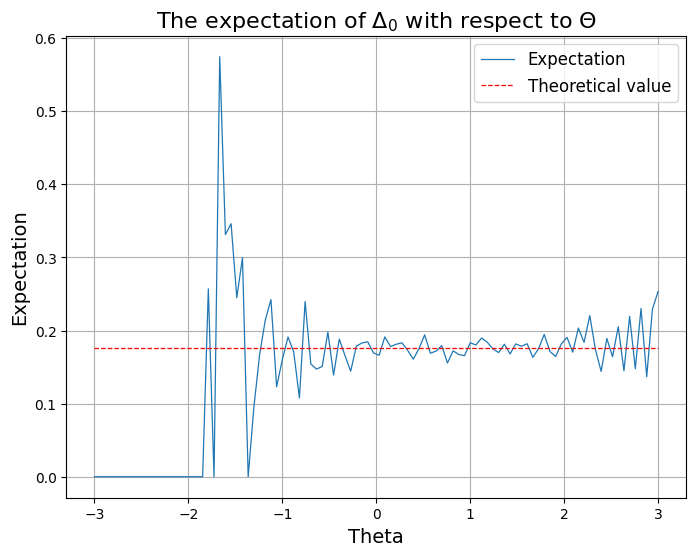

In [17]:

# Define the range of theta values
theta_values = np.linspace(-3, 3, 100, endpoint=True)

# Compute the expectations for each theta value
expectations = [Delta0_2(r, sigma, S0, T, K, M, theta, n)[0] for theta in theta_values]

# Create the plot
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(theta_values, expectations, label="Expectation", linewidth=.9)
ax.hlines(theorical_value, xmin=-3, xmax=3, label="Theoretical value", linestyle='--', color='red', linewidth=.9)
ax.set_xlabel("Theta", fontsize=14)
ax.set_ylabel("Expectation", fontsize=14)
ax.set_title("The expectation of $\Delta_0$ with respect to $\Theta$", fontsize=16)
ax.legend(loc="best", fontsize=12)
ax.grid(True)
plt.show()

Changing the probability measure introduces the effect of importance sampling. However, if we choose a small value for $\theta$, the event $S_T > K$ may not be detected, resulting in an expectation of 0. On the other hand, if we choose a large value for $\theta$, $S_T > K$ is almost always observed, making it an unreliable expectation. In this case, the variance of $Z^\theta$ becomes the source of error.


4. Build a program which produces a Monte Carlo approximation of the variance $V^{\theta}$ for each given value of the parameter $\theta$.

We simply reuse the code in Question 3.

In [7]:
def V_theta(r, sigma, S0, T, K, M, theta, n=1):
    '''
    Returns the Monte Carlo approximation of the variance V^theta based on the representation (2) and a sample of M independent copies of S_T.

    Parameters:
    r (float): risk-free interest rate
    sigma (float): volatility
    S0 (float): initial stock price
    T (float): maturity
    K (float): strike price
    M (int): number of paths of S_T
    theta (float): parameter for the probability measure Q^theta
    n (int): number of time steps

    Returns:
    float: the Monte Carlo approximation of the variance V^theta
    '''
    dt = T / n
    # Simulate Brownian motion
    BM = np.random.normal(0.0, np.sqrt(dt), size=(M, n + 1))
    BM[:, 0] = 0
    BM = BM.cumsum(axis=1)

    # Under Q, B_T is equal to a brownian motion plus theta*T
    B_T = BM[:, -1] + theta * T

    # Then we get S_T
    S_T = S0 * np.exp((r - sigma ** 2 / 2) * T + sigma * B_T)

    # We return the variance of (S_T > K) / Z^theta
    Ztheta = np.exp(theta * B_T - theta ** 2 * T / 2)
    return np.var((S_T > K) / Ztheta)

5. Using the values of the parameters of Question 3, plot the Monte Carlo approximation of the variance $V^{\theta}$ in terms of $\theta$. Investigate the stability of the results in terms of the sample size $M$. Comment the findings.

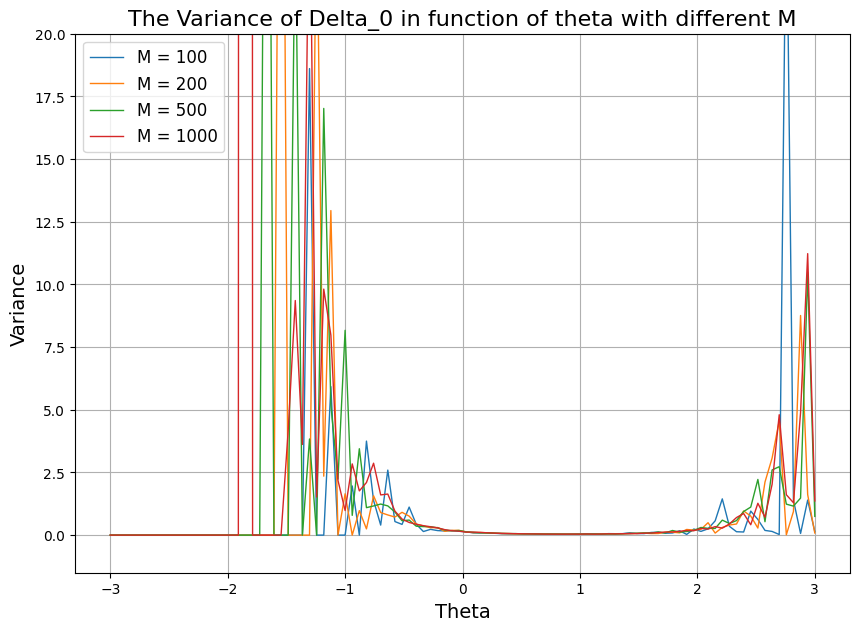

In [8]:
# Define the range of theta values
theta_values = np.linspace(-3, 3, 100, endpoint=True)

# Define the values of M to use
M_values = [100, 200, 500, 1000]

# Define the number of time steps
n = 100

# Create the plot
fig, ax = plt.subplots(figsize=(10, 7))

# Plot the variance for each value of M
for M in M_values:
    variances = [V_theta(r, sigma, S0, T, K, M, theta, n) for theta in theta_values]
    ax.plot(theta_values, variances, label="M = {}".format(M), linewidth=1)

# Add labels and title
ax.set_xlabel("Theta", fontsize=14)
ax.set_ylabel("Variance", fontsize=14)
ax.set_title("The Variance of Delta_0 in function of theta with different M", fontsize=16)

# Set the y-axis limits
ax.set_ylim(-1.5, 20)

# Add legend and grid
ax.legend(loc="best", fontsize=12)
ax.grid(True)

# Show the plot
plt.show()


**Remark:** This example demonstrates the impact of changing the probability measure. We observe that as $\theta$ becomes smaller, $V^\theta$ tends toward 0, consistently yielding 0. Conversely, with a larger sample size (greater $M$), there's an increased likelihood of witnessing the event $S_T > K$. Consequently, the variance becomes substantial because $Z^\theta$ is exceedingly small.
The interval $[0, 2]$ exhibits stability.

For $\theta > 2$, it is the variance of $Z^\theta$ itself that contributes to the significant variance in $V^\theta$.
